# Classify Song Genres from Audio Data
## Minor Project
## Technocolab Internship 
### By Deepika Bhatt


# Problem Statement
Over the past few years, streaming services with huge catalogs have become the primary means through which most people listen to their favorite music. But at the same time, the sheer amount of music on offer can mean users might be a bit overwhelmed when trying to look for newer music that suits their tastes.
For this reason, streaming services have looked into means of categorizing music to allow for personalized recommendations. One method involves direct analysis of the raw audio information in a given song, scoring the raw data on a variety of metrics. Today, we'll be examining data compiled by a research group known as The Echo Nest. Our goal is to look through this dataset and classify songs as being either 'Hip-Hop' or 'Rock' - all without listening to a single one ourselves. In doing so, we will learn how to clean our data, do some exploratory data visualization, and use feature reduction towards the goal of feeding our data through some simple machine learning algorithms, such as decision trees and logistic regression.
To begin with, let's load the metadata about our tracks alongside the track metrics compiled by The Echo Nest. A song is about more than its title, artist, and number of listens. We have another dataset that has musical features of each track such as danceability and acousticness on a scale from -1 to 1. These exist in two different files, which are in different formats - CSV and JSON. While CSV is a popular file format for denoting tabular data, JSON is another common file format in which databases often return the results of a given query.

In [1]:
import os
os.chdir("C:\\Users\\deepi\\Desktop\\data science\\Internship\\Technocolab")

In [2]:
#setting working directory
import os
os.chdir("C:\\Users\\deepi\\Desktop\\data science\\Internship\\Technocolab")

In [3]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#import required libraries
## for dataframe manipuration and calculation of metrics
import pandas as pd
import numpy as np

##for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## for scaling
from sklearn.preprocessing import StandardScaler

## for PCA
from sklearn.decomposition import PCA

## for splitting the dataset
from sklearn.model_selection import train_test_split

## libraries required for data modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

#to view maximum rows and columns
pd.set_option("display.max_rows", None,"display.max_columns", None)

## Understanding Data


In [4]:
#importing dataset
track_genre = pd.read_csv("fma-rock-vs-hiphop.csv")

In [5]:
#let's look at the dataset
track_genre.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]","[58, 12, 45]",NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]","[58, 12, 45]",NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],"[25, 12]",NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],"[25, 12]",NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],"[26, 12]",NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [6]:
# filtered the required column for the analysis
track_genre = track_genre[["track_id", "genre_top"]]

In [7]:
# importing echo dataset
echo = pd.read_json("echonest-metrics.json")

In [8]:
#let's look at the echo dataset
echo.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [9]:
#merge bot the dataset
track = echo.merge(track_genre, how = "inner", on = "track_id")

In [10]:
# let's look at the merged dataset
track.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock


In [11]:
# let's look at the shape of the data
track.shape

(4802, 10)

In [12]:
#let's look at the basic information of the data
track.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


In [13]:
# checking imbalance of data
track.genre_top.value_counts()/len(track)*100

Rock       81.049563
Hip-Hop    18.950437
Name: genre_top, dtype: float64

In [14]:
#define a series with genre top for later use
label = track["genre_top"]

## Exploratory Data Analysis

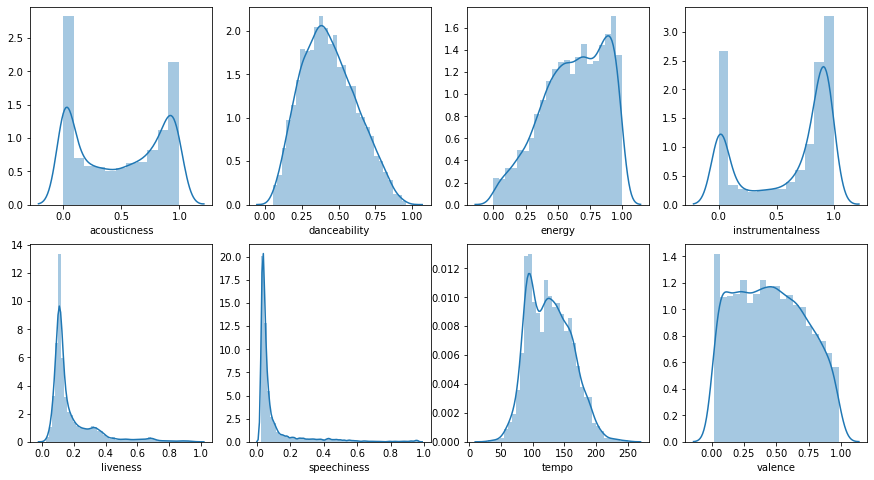

In [15]:
# Distribution plot of all the continious variables in the dataset
plt.figure(figsize = (15,8))
plt.subplot(2,4,1)
sns.distplot(track["acousticness"])

plt.subplot(2,4,2)
sns.distplot(track["danceability"])

plt.subplot(2,4,3)
sns.distplot(track["energy"])

plt.subplot(2,4,4)
sns.distplot(track["instrumentalness"])

plt.subplot(2,4,5)
sns.distplot(track["liveness"])

plt.subplot(2,4,6)
sns.distplot(track["speechiness"])

plt.subplot(2,4,7)
sns.distplot(track["tempo"])

plt.subplot(2,4,8)
sns.distplot(track["valence"])

plt.show()


### Pairwise relationships between continuous variables
We typically want to avoid using variables that have strong correlations with each other, hence avoiding feature redundancy for the few reasons:

--To keep the model simple and improve interpretability (with many features, we run the risk of overfitting).

--When our datasets are very large, using fewer features can drastically speed up our computation time.

--To get a sense of whether there are any strongly correlated features in our data, we will use built-in functions in the pandas package.

In [16]:
# define dataframe with features
feature_data = track.drop(["track_id", "genre_top"], axis = 1)

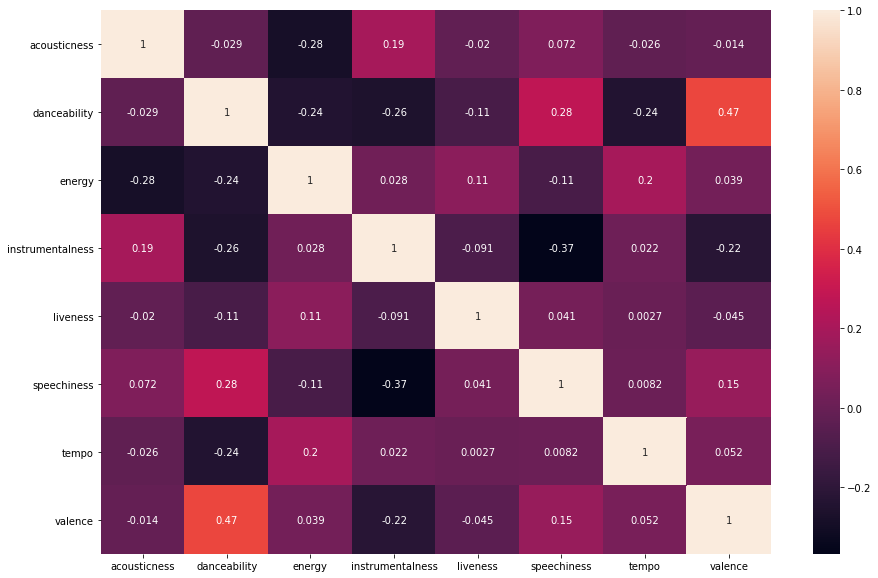

In [17]:
#heatmap for visualizing corelation 
plt.figure(figsize=(15,10))
sns.heatmap(feature_data.corr(), annot= True)
plt.show()

## Preparing Data for Modelling

### Outliers Treatment

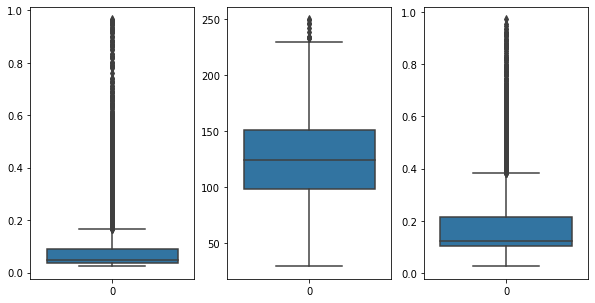

In [18]:
# boxplot for to visualize outliers
plt.figure(figsize = (10,5))
plt.subplot(1,3,1)
sns.boxplot(data = feature_data["speechiness"])

plt.subplot(1,3,2)
sns.boxplot(data = feature_data["tempo"])

plt.subplot(1,3,3)
sns.boxplot(data = feature_data["liveness"])
                                
plt.show()

In [19]:
# soft capping 
Q1 = feature_data["speechiness"].quantile(0.01)
Q3 = feature_data["speechiness"].quantile(0.99)
IQR = Q3-Q1
feature_data = feature_data[(feature_data.speechiness < Q3+1.5*IQR) & (feature_data.speechiness > Q1-1.5*IQR)]

Q1 = feature_data["tempo"].quantile(0.01)
Q3 = feature_data["tempo"].quantile(0.99)
IQR = Q3-Q1
feature_data = feature_data[(feature_data.tempo < Q3+1.5*IQR) & (feature_data.tempo > Q1-1.5*IQR)]

Q1 = feature_data["liveness"].quantile(0.01)
Q3 = feature_data["liveness"].quantile(0.99)
IQR = Q3-Q1
feature_data = feature_data[(feature_data.liveness < Q3+1.5*IQR) & (feature_data.liveness > Q1-1.5*IQR)]

### Normalizing the feature data
As mentioned earlier, it can be particularly useful to simplify our models and use as few features as necessary to achieve the best result. Since we didn't find any particular strong correlations between our features, we can instead use a common approach to reduce the number of features called principal component analysis (PCA).
It is possible that the variance between genres can be explained by just a few features in the dataset. PCA rotates the data along the axis of highest variance, thus allowing us to determine the relative contribution of each feature of our data towards the variance between classes.
However, since PCA uses the absolute variance of a feature to rotate the data, a feature with a broader range of values will overpower and bias the algorithm relative to the other features. To avoid this, we must first normalize our data. There are a few methods to do this, but a common way is through standardization, such that all features have a mean = 0 and standard deviation = 1 (the resultant is a z-score).

In [20]:
#scaling
scaler = StandardScaler()

In [21]:
# fitting and transform
feature_scaled = scaler.fit_transform(feature_data)
feature_scaled = pd.DataFrame(feature_scaled)
feature_scaled.columns = ['acousticness', 'danceability', 'energy', 'instrumentalness','liveness', 'speechiness',
                               'tempo', 'valence']
feature_scaled.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,-0.191210,1.304420,0.038316,-1.576494,-0.068755,0.373034,1.153979,0.462287
1,-0.306036,0.501886,0.788176,-1.599809,-0.545463,2.446155,0.007914,-0.690811
2,-1.204813,1.684139,0.312852,-1.602876,1.229828,0.135130,-0.777317,0.631077
3,-0.094655,0.417927,-0.265203,-1.553079,-0.607326,2.882707,-0.364657,1.652859
4,1.361706,-0.985896,1.453323,0.979975,-0.442757,-0.364157,-1.072003,-1.573102


### Principal Component Analysis on our scaled data
Now that we have preprocessed our data, we are ready to use PCA to determine by how much we can reduce the dimensionality of our data. We can use scree-plots and cumulative explained ratio plots to find the number of components to use in further analyses.
Scree-plots display the number of components against the variance explained by each component, sorted in descending order of variance. Scree-plots help us get a better sense of which components explain a sufficient amount of variance in our data. When using scree plots, an 'elbow' (a steep drop from one data point to the next) in the plot is typically used to decide on an appropriate cutoff

In [22]:
# explained variance ratio for all the features using PCA
pca = PCA()
pca.fit(feature_scaled)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.24297674, 0.18044316, 0.13650309, 0.12994089, 0.11056248,
       0.08302245, 0.06923783, 0.04731336])

In [23]:
# list of number of components
no_of_variables = pca.n_components_
no_of_variables = [i for i in range(1,no_of_variables+1)]

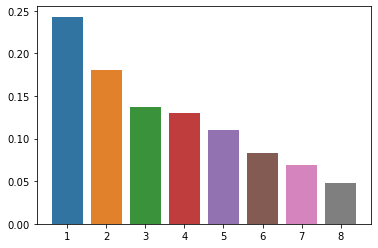

In [24]:
# scree plot
sns.barplot(no_of_variables, explained_variance);
plt.plot();

In [25]:
# cumulative explained varience
cumulative_explained_variance = np.cumsum(explained_variance)

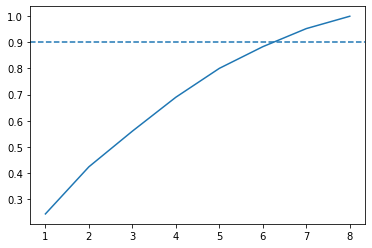

In [26]:
#cumulative explained ratio plots
sns.lineplot(no_of_variables, cumulative_explained_variance)
plt.axhline(0.9, linestyle = "--")

plt.show()

In [27]:
# n_componenet = 7
pca = PCA(n_components=7, random_state= 200)
pca.fit(feature_scaled)
pca_projection = pca.transform(feature_scaled)

## Train a decision tree to classify genre
Now we can use the lower dimensional PCA projection of the data to classify songs into genres. To do that, we first need to split our dataset into 'train' and 'test' subsets, where the 'train' subset will be used to train our model while the 'test' dataset allows for model performance validation.
Here, we will be using a simple algorithm known as a decision tree. Decision trees are rule-based classifiers that take in features and follow a 'tree structure' of binary decisions to ultimately classify a data point into one of two or more categories. In addition to being easy to both use and interpret, decision trees allow us to visualize the 'logic flowchart' that the model generates from the training data.
Here is an example of a decision tree that demonstrates the process by which an input image (in this case, of a shape) might be classified based on the number of sides it has and whether it is rotated

#### Splitting the dataset

In [28]:
# dividing the dataset 
X = pca_projection
y = label

In [29]:
# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
# fit the data in decision tree model
Decision_tree = DecisionTreeClassifier(random_state= 300)
Decision_tree.fit(X_train,y_train)

# predicting
y_predict = Decision_tree.predict(X_test)

summary_report = classification_report(y_test,y_predict)
print(summary_report)

              precision    recall  f1-score   support

     Hip-Hop       0.64      0.64      0.64       266
        Rock       0.92      0.92      0.92      1175

    accuracy                           0.87      1441
   macro avg       0.78      0.78      0.78      1441
weighted avg       0.87      0.87      0.87      1441



In [31]:
# logistic regression model
logr = LogisticRegression(random_state= 400)
logr.fit(X_train,y_train)

#predict
y_predict = logr.predict(X_test)

summary_report = classification_report(y_test,y_predict)
print(summary_report)

              precision    recall  f1-score   support

     Hip-Hop       0.78      0.60      0.68       266
        Rock       0.91      0.96      0.94      1175

    accuracy                           0.89      1441
   macro avg       0.85      0.78      0.81      1441
weighted avg       0.89      0.89      0.89      1441

